# California Housing Prices

## Question of Interest
Use a machine learning model to predict the average prices of houses in areas of California, based on a range of factors.



## Executive Summary
Three models were tested: Linear Regression, Gradient-Boosting Regressor, and Decision Tree Regressor.

The most effective model was found to be the Gradient-Boosting Regressor, with a mean-squared error of ~US$55,000.


The 3 most important factors for predicting house prices in a given area were:
1) median income in the area
2) whether the area was inland
3) population per household in the area


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

## Preparing the Data
### Importing California Housing data from local files

In [2]:
from pathlib import Path

data_path = Path('.')
get_path = lambda fn: data_path / fn
get_path('X_train.csv')

X_train = pd.read_csv(get_path('X_train.csv'), index_col=0)
y_train = np.ravel(pd.read_csv(get_path('y_train.csv'), index_col=0))
X_test = pd.read_csv(get_path('X_test.csv'), index_col=0)
y_test = np.ravel(pd.read_csv(get_path('y_test.csv'), index_col=0))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 16), (16512,), (4128, 16), (4128,))

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1862 to 14525
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   population_per_household  16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  <1H OCEAN                 16512 non-null  float64
 12  INLAND                    16512 non-null  float64
 13  ISLAND                    16512 non-null  float64
 14  NEAR BAY

In [4]:
y_train

array([103100.,  62000.,  60400., ..., 319100., 120000., 169600.])

## Model Selection
### Training several candidate models

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = GradientBoostingRegressor()

In [6]:
from sklearn.model_selection import cross_val_predict

### Evaluating the in-sample performance of each model

Decision Tree Regressor Mean Squared Error: 0.0
Linear Regression Mean Squared Error: 67985.6005921445
Gradient-Boosting Regressor Mean Squared Error: 50653.02408307322


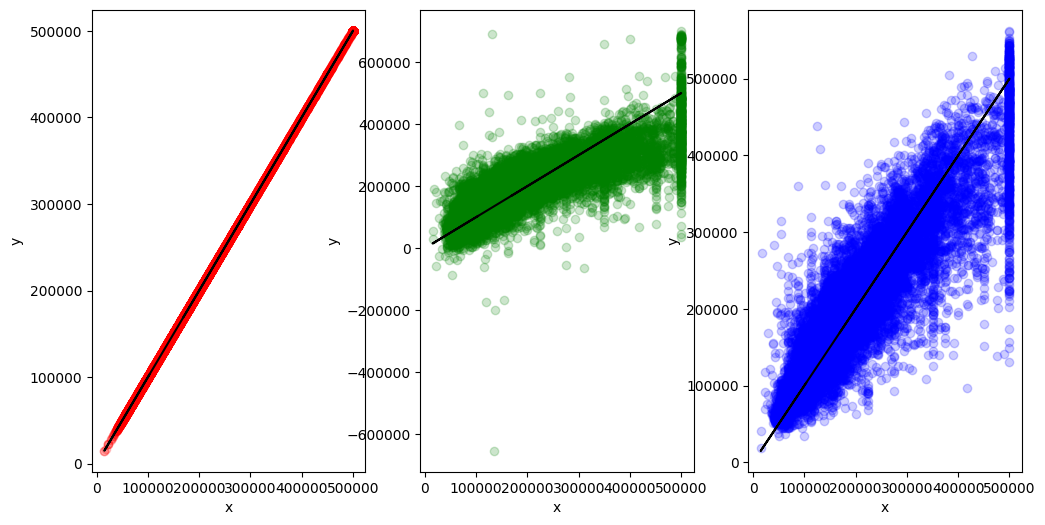

In [7]:
plt.figure(figsize=(12, 6))

model1.fit(X_train, y_train)
y_hat = model1.predict(X_train)
plt.subplot(1, 3, 1)
plt.plot(y_train, y_hat, 'ro', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(y_train, y_train, 'k')
print("Decision Tree Regressor Mean Squared Error: " + str(np.sqrt(mean_squared_error(y_train,y_hat))))

model2.fit(X_train, y_train)
y_hat = model2.predict(X_train)
plt.subplot(1, 3, 2)
plt.plot(y_train, y_hat, 'go', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(y_train, y_train, 'k')
print("Linear Regression Mean Squared Error: " + str(np.sqrt(mean_squared_error(y_train,y_hat))))

model3.fit(X_train, y_train)
y_hat = model3.predict(X_train)
plt.subplot(1, 3, 3)
plt.plot(y_train, y_hat, 'bo', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(y_train, y_train, 'k')
print("Gradient-Boosting Regressor Mean Squared Error: " + str(np.sqrt(mean_squared_error(y_train,y_hat))))

DecisionTreeRegressor is overfitted. LinearRegression has negative values and higher MSE than the next. GradientBoostingRegressor has improved MSE, is not overfitted, and predicts no negatives

### Evaluating the out-of-sample performance of these models

DecisionTreeRegressor Out-of-Sample Performance; MSE: 70401.85363295939
LinearRegression Out-of-Sample Performance; MSE: 69595.0807468393
GradientBoostingRegressor Out-of-Sample Performance; MSE: 54159.86644116931


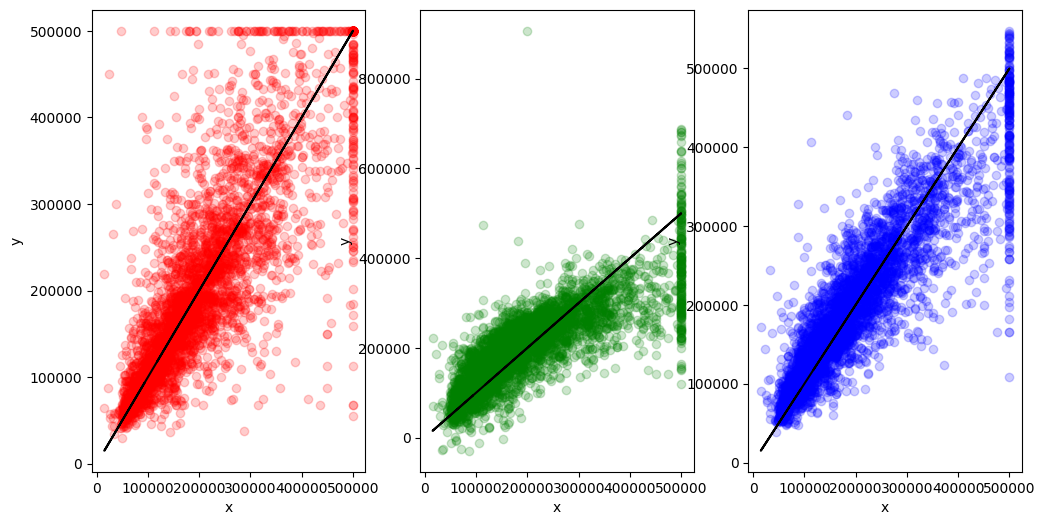

In [8]:
plt.figure(figsize=(12, 6))

y_hat = model1.predict(X_test)
plt.subplot(1, 3, 1)
plt.plot(y_test, y_hat, 'ro', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(y_test, y_test, 'k')
print("DecisionTreeRegressor Out-of-Sample Performance; MSE: " + str(np.sqrt(mean_squared_error(y_test,y_hat))))

y_hat = model2.predict(X_test)
plt.subplot(1, 3, 2)
plt.plot(y_test, y_hat, 'go', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(y_test, y_test, 'k')
print("LinearRegression Out-of-Sample Performance; MSE: " + str(np.sqrt(mean_squared_error(y_test,y_hat))))

y_hat = model3.predict(X_test)
plt.subplot(1, 3, 3)
plt.plot(y_test, y_hat, 'bo', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(y_test, y_test, 'k')
print("GradientBoostingRegressor Out-of-Sample Performance; MSE: " + str(np.sqrt(mean_squared_error(y_test,y_hat))))


GradientBoostingRegressor once again performs the best

### Using cross-validation to analyse the out-of-sample performance only using the train set

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

# Create a KFold object with k=12
k_fold = KFold(n_splits=12)  

# Perform cross-validation and get predictions
y_hat = cross_val_predict(model1, X_train, y_train,cv=k_fold)
print("DecisionTreeRegressor Out-of-Sample Performance with Cross-Validation (MSE) = " + str(np.sqrt(mean_squared_error(y_train,y_hat))))

y_hat = cross_val_predict(model2, X_train, y_train,cv=k_fold)
print("LinearRegression Out-of-Sample Performance with Cross-Validation (MSE) = " + str(np.sqrt(mean_squared_error(y_train,y_hat))))

y_hat = cross_val_predict(model3, X_train, y_train,cv=k_fold)
print("GradientBoostingRegressor Out-of-Sample Performance with Cross-Validation (MSE) = " + str(np.sqrt(mean_squared_error(y_train,y_hat))))

DecisionTreeRegressor Out-of-Sample Performance with Cross-Validation (MSE) = 69848.94908544108
LinearRegression Out-of-Sample Performance with Cross-Validation (MSE) = 68269.71667378052
GradientBoostingRegressor Out-of-Sample Performance with Cross-Validation (MSE) = 52708.54084754981


Using 12 folds, GradientBoostingRegressor was, once again, the superior model

## Gaining insights
### Inspecting the `.coeff_` or the `.feature_importances_` attribute of the best performing model

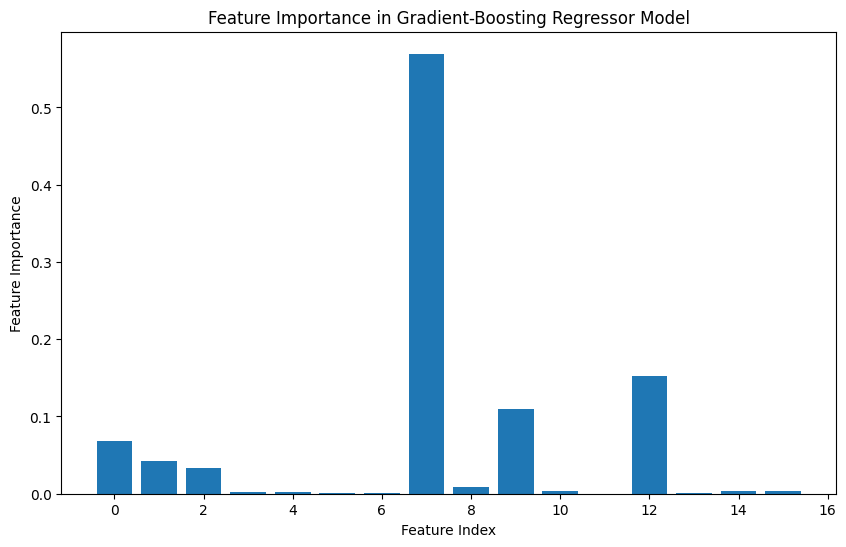

In [10]:
plt.figure(figsize=(10, 6))
# for 16 variables
plt.bar(range(16), model3.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Gradient-Boosting Regressor Model");

In [11]:
print("The 3 most important factors for predicting house prices in a given area were:")
print("1st most important:", X_train.columns[7], "in the area")
print("2nd most important: whether the area was", X_train.columns[12].lower())
print("3rd most important:", X_train.columns[9], "in the area")

The 3 most important factors for predicting house prices in a given area were:
1st most important: median_income in the area
2nd most important: whether the area was inland
3rd most important: population_per_household in the area
